# Import libraries

In [74]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


# Load dataset

In [77]:
df = pd.read_csv("./data.csv")

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Data Preprocessing

## Sanity Check

### Dimensions of dataframe

In [37]:
df.shape

(569, 33)

### Info of dataframe

In [5]:
df.info

<bound method DataFrame.info of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0

### Check for null values %

In [38]:
(df.isnull().sum()/df.shape[0])*100

id                           0.0
diagnosis                    0.0
radius_mean                  0.0
texture_mean                 0.0
perimeter_mean               0.0
area_mean                    0.0
smoothness_mean              0.0
compactness_mean             0.0
concavity_mean               0.0
concave points_mean          0.0
symmetry_mean                0.0
fractal_dimension_mean       0.0
radius_se                    0.0
texture_se                   0.0
perimeter_se                 0.0
area_se                      0.0
smoothness_se                0.0
compactness_se               0.0
concavity_se                 0.0
concave points_se            0.0
symmetry_se                  0.0
fractal_dimension_se         0.0
radius_worst                 0.0
texture_worst                0.0
perimeter_worst              0.0
area_worst                   0.0
smoothness_worst             0.0
compactness_worst            0.0
concavity_worst              0.0
concave points_worst         0.0
symmetry_w

### Check for duplicate rows

In [7]:
df.duplicated().sum()

0

### Check for garbage values

In [8]:
for i in df.select_dtypes(include=['object']).columns:
    print(df[i].value_counts())
    print("*"*50)

diagnosis
B    357
M    212
Name: count, dtype: int64
**************************************************


## Initial EDA

### Descriptive statistics

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


### Historogram to understand distribution

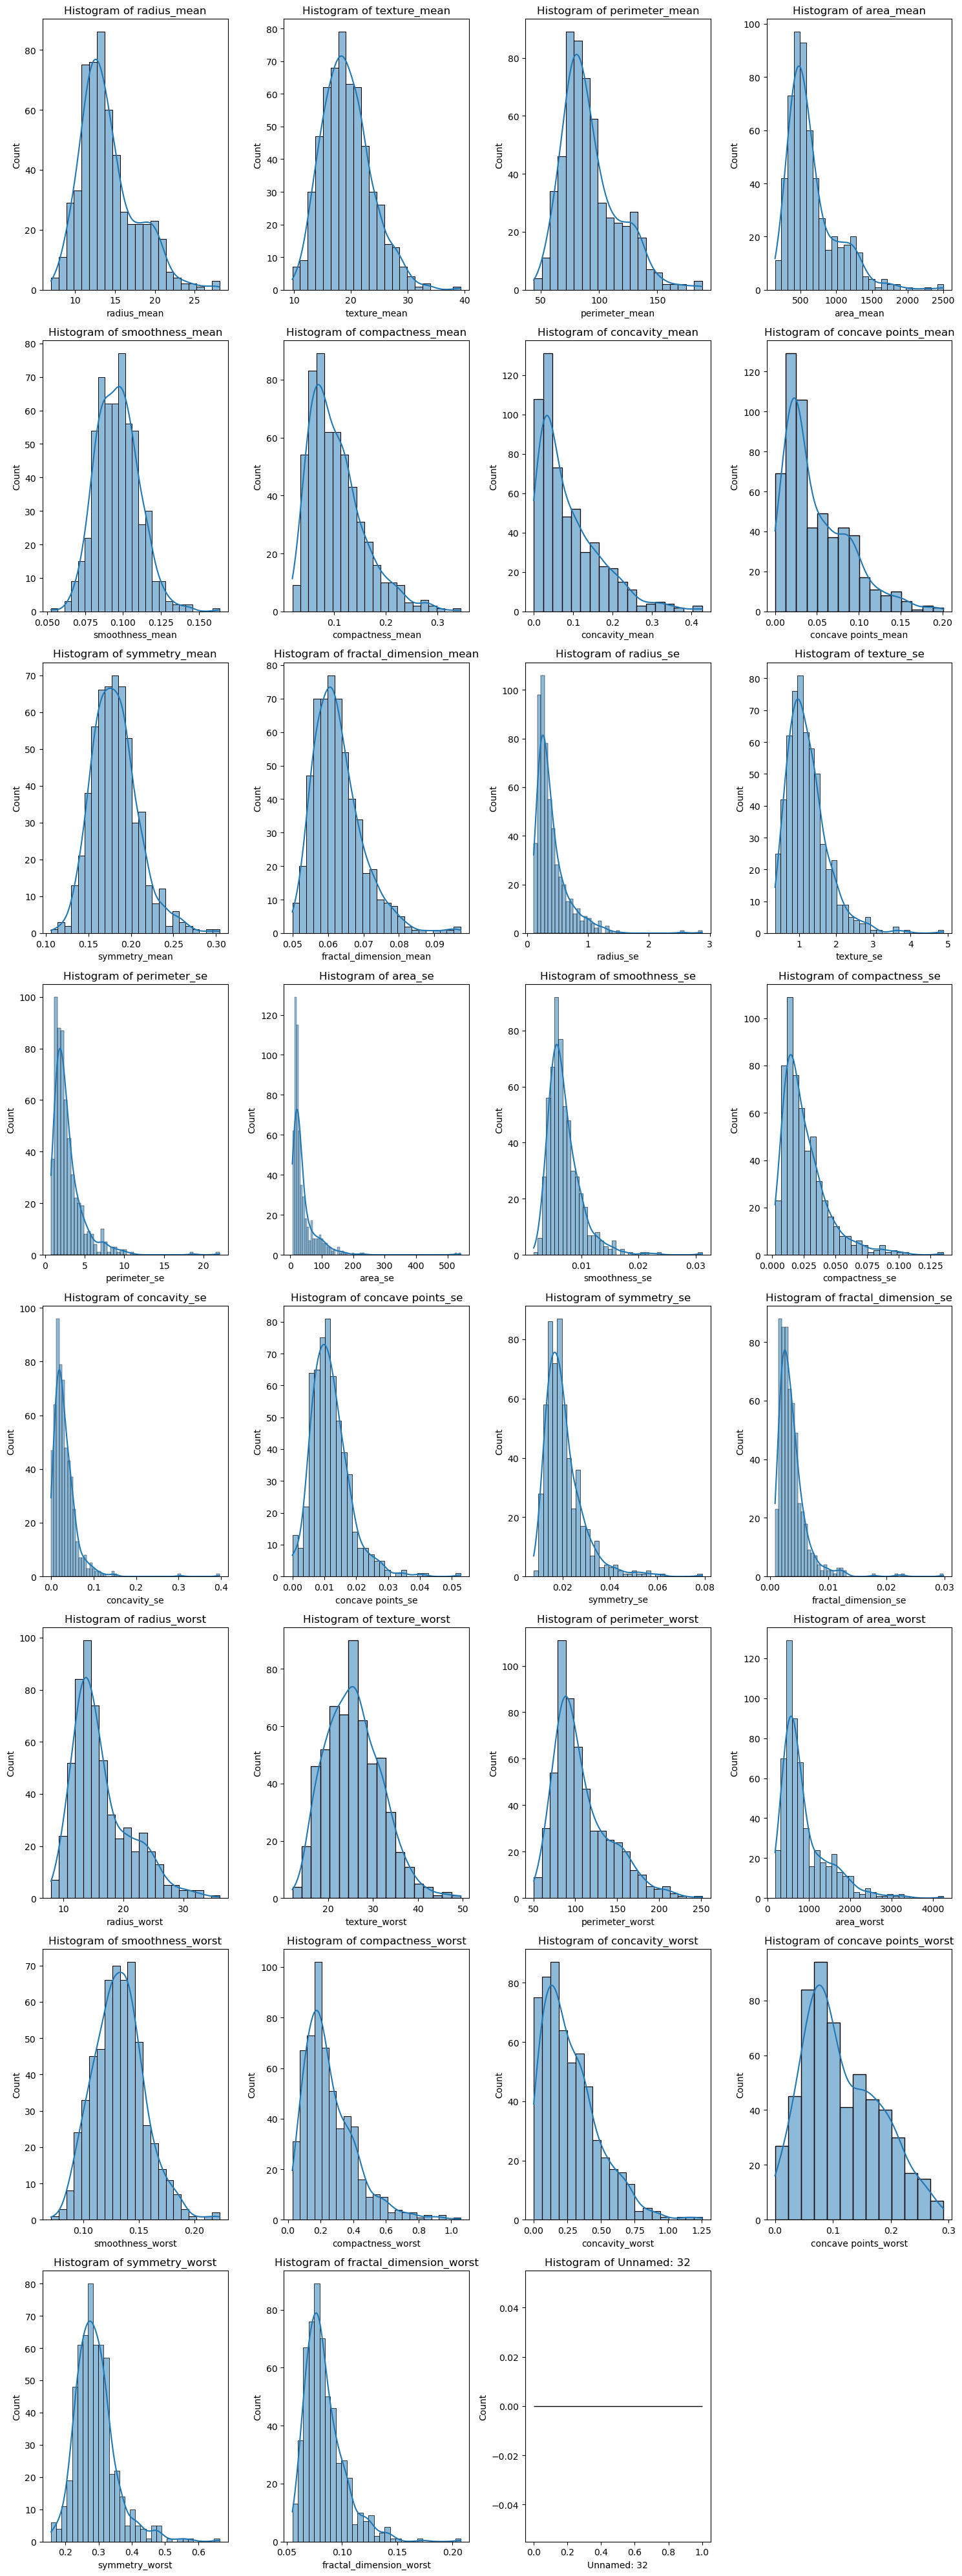

In [75]:

float_columns = df.select_dtypes(include=["float"]).columns
num_columns = len(float_columns)

n_cols = 4  
n_rows = math.ceil(num_columns / n_cols)


fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  

for i, col in enumerate(float_columns):
    sns.histplot(data=df, x=col, ax=axes[i], kde=True)  
    axes[i].set_title(f"Histogram of {col}")

for j in range(i + 1, len(axes)):
    axes[j].axis('off')  

plt.tight_layout()  
plt.show()


### Box plot to identify outliers

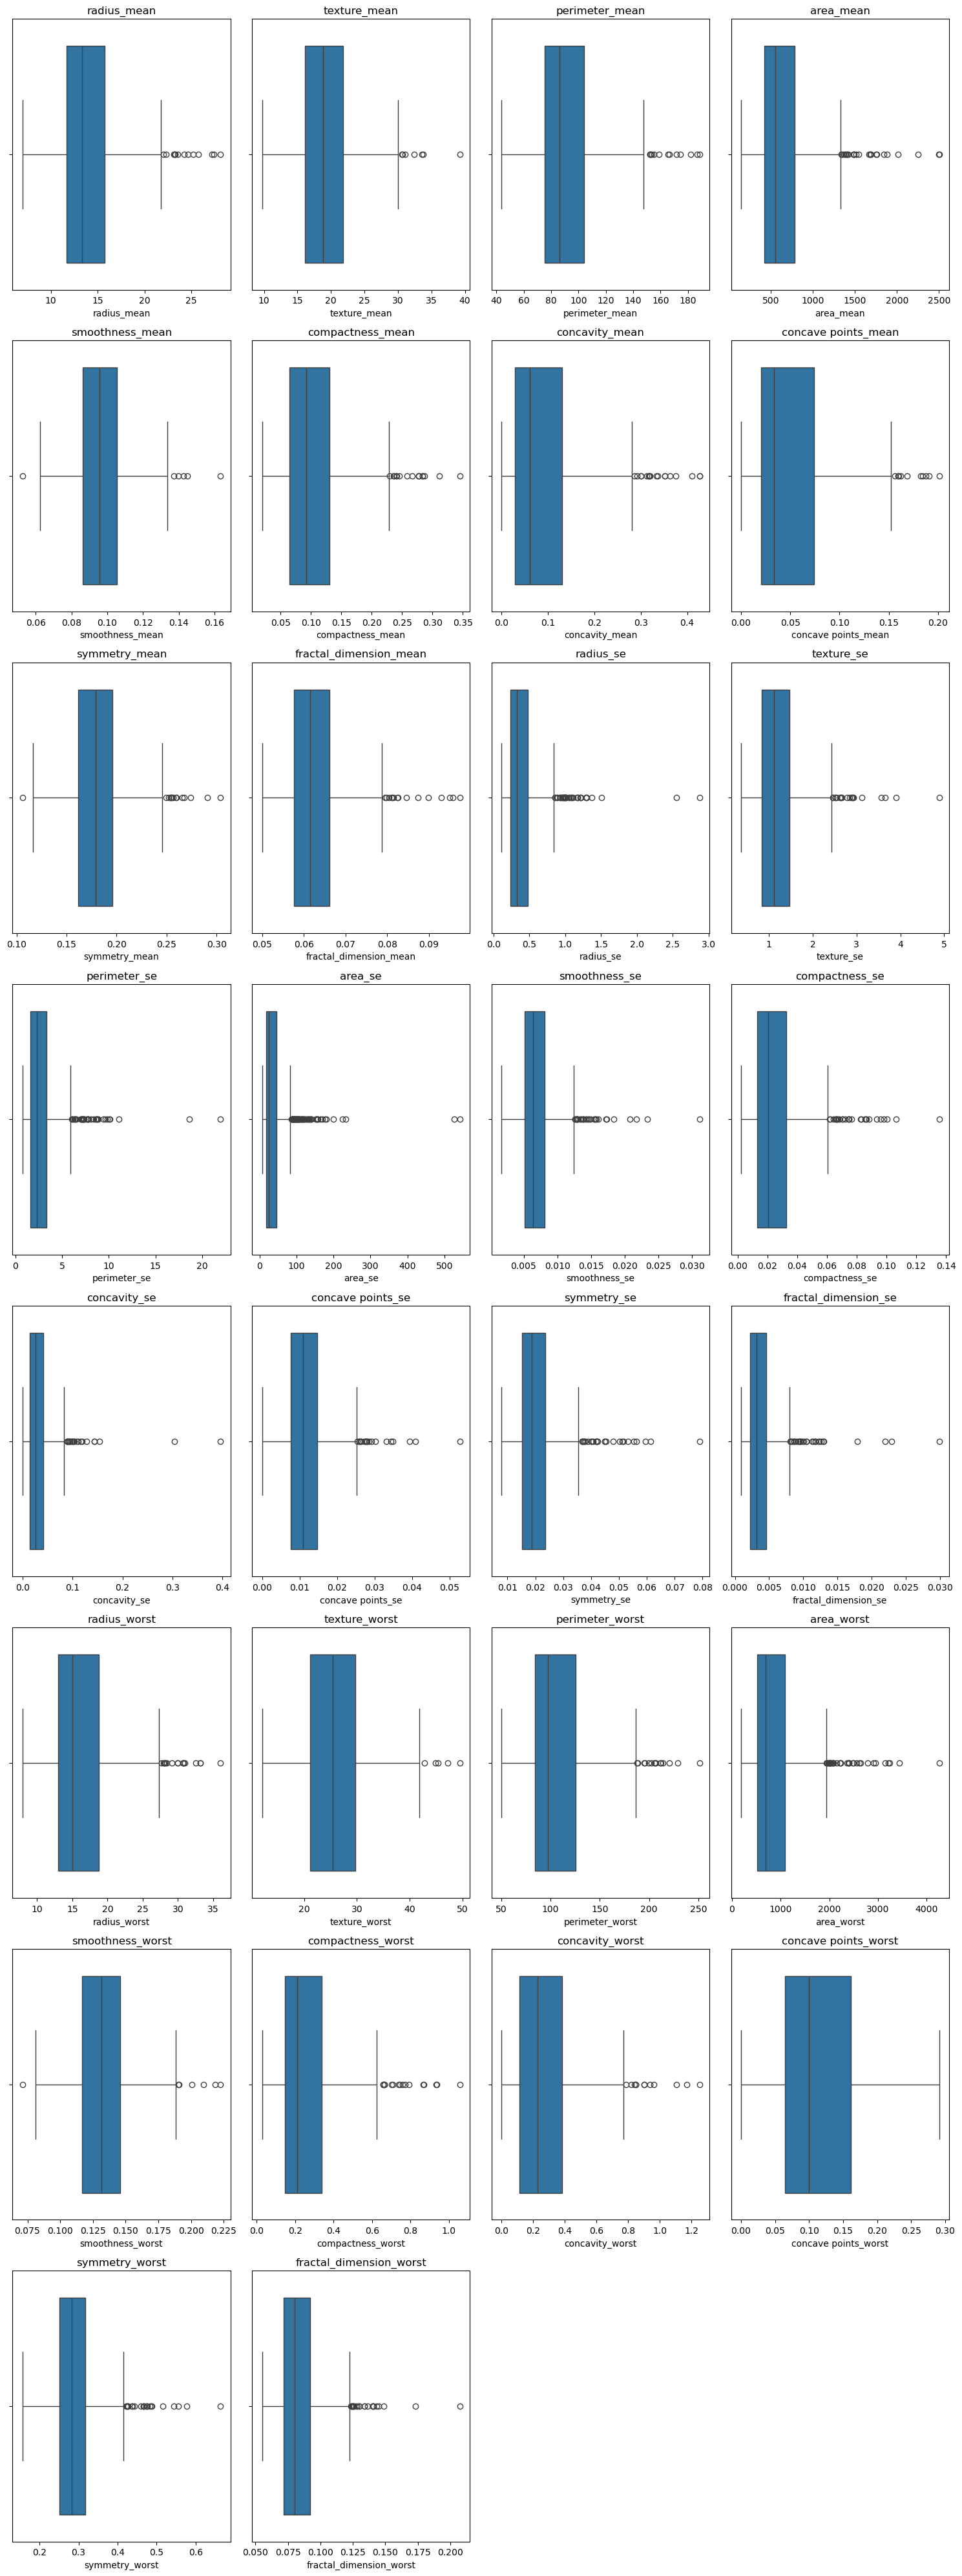

In [72]:
float_columns = df.select_dtypes(include=["float"]).columns
columns_to_plot = [col for col in float_columns if df[col].notna().any()]

num_columns = len(columns_to_plot)
n_cols = 4  
n_rows = math.ceil(num_columns / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  

for i, col in enumerate(columns_to_plot):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f"{col}")

for j in range(i + 1, len(axes)):
    axes[j].axis('off')  

plt.tight_layout()  
plt.show()


### Scatter plot to identify relationships

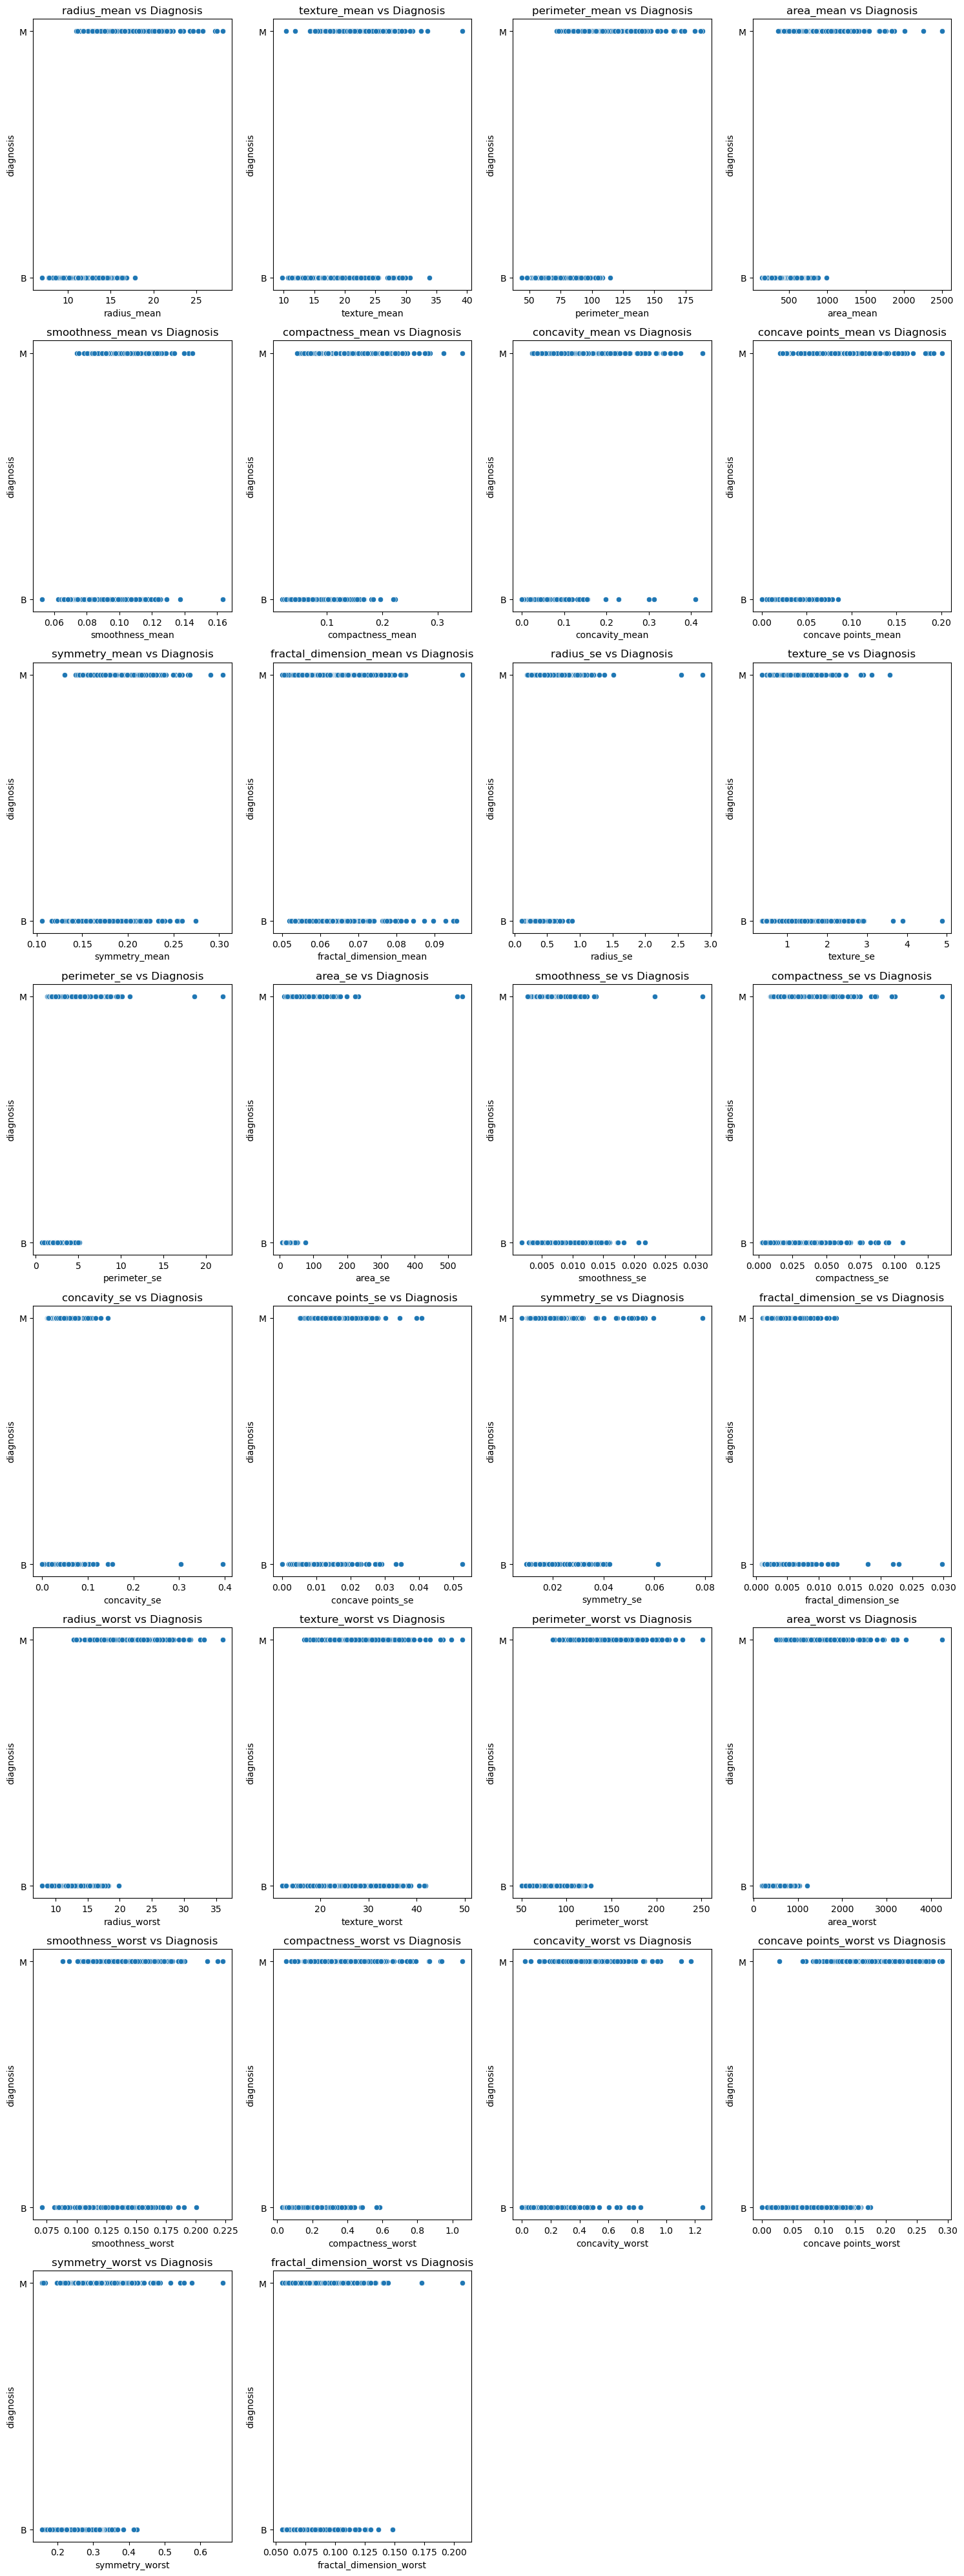

In [ ]:
float_columns = df.select_dtypes(include=["float"]).columns
columns_to_plot = [col for col in float_columns if df[col].notna().any()]

num_columns = len(columns_to_plot)
n_cols = 4  
n_rows = math.ceil(num_columns / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  

for i, col in enumerate(columns_to_plot):
    sns.scatterplot(data=df, x=col, y='diagnosis', ax=axes[i])
    axes[i].set_title(f"{col} vs Diagnosis")

for j in range(i + 1, len(axes)):
    axes[j].axis('off')  

plt.tight_layout()  
plt.show()

### Correlation matrix to understand relationship

<Axes: >

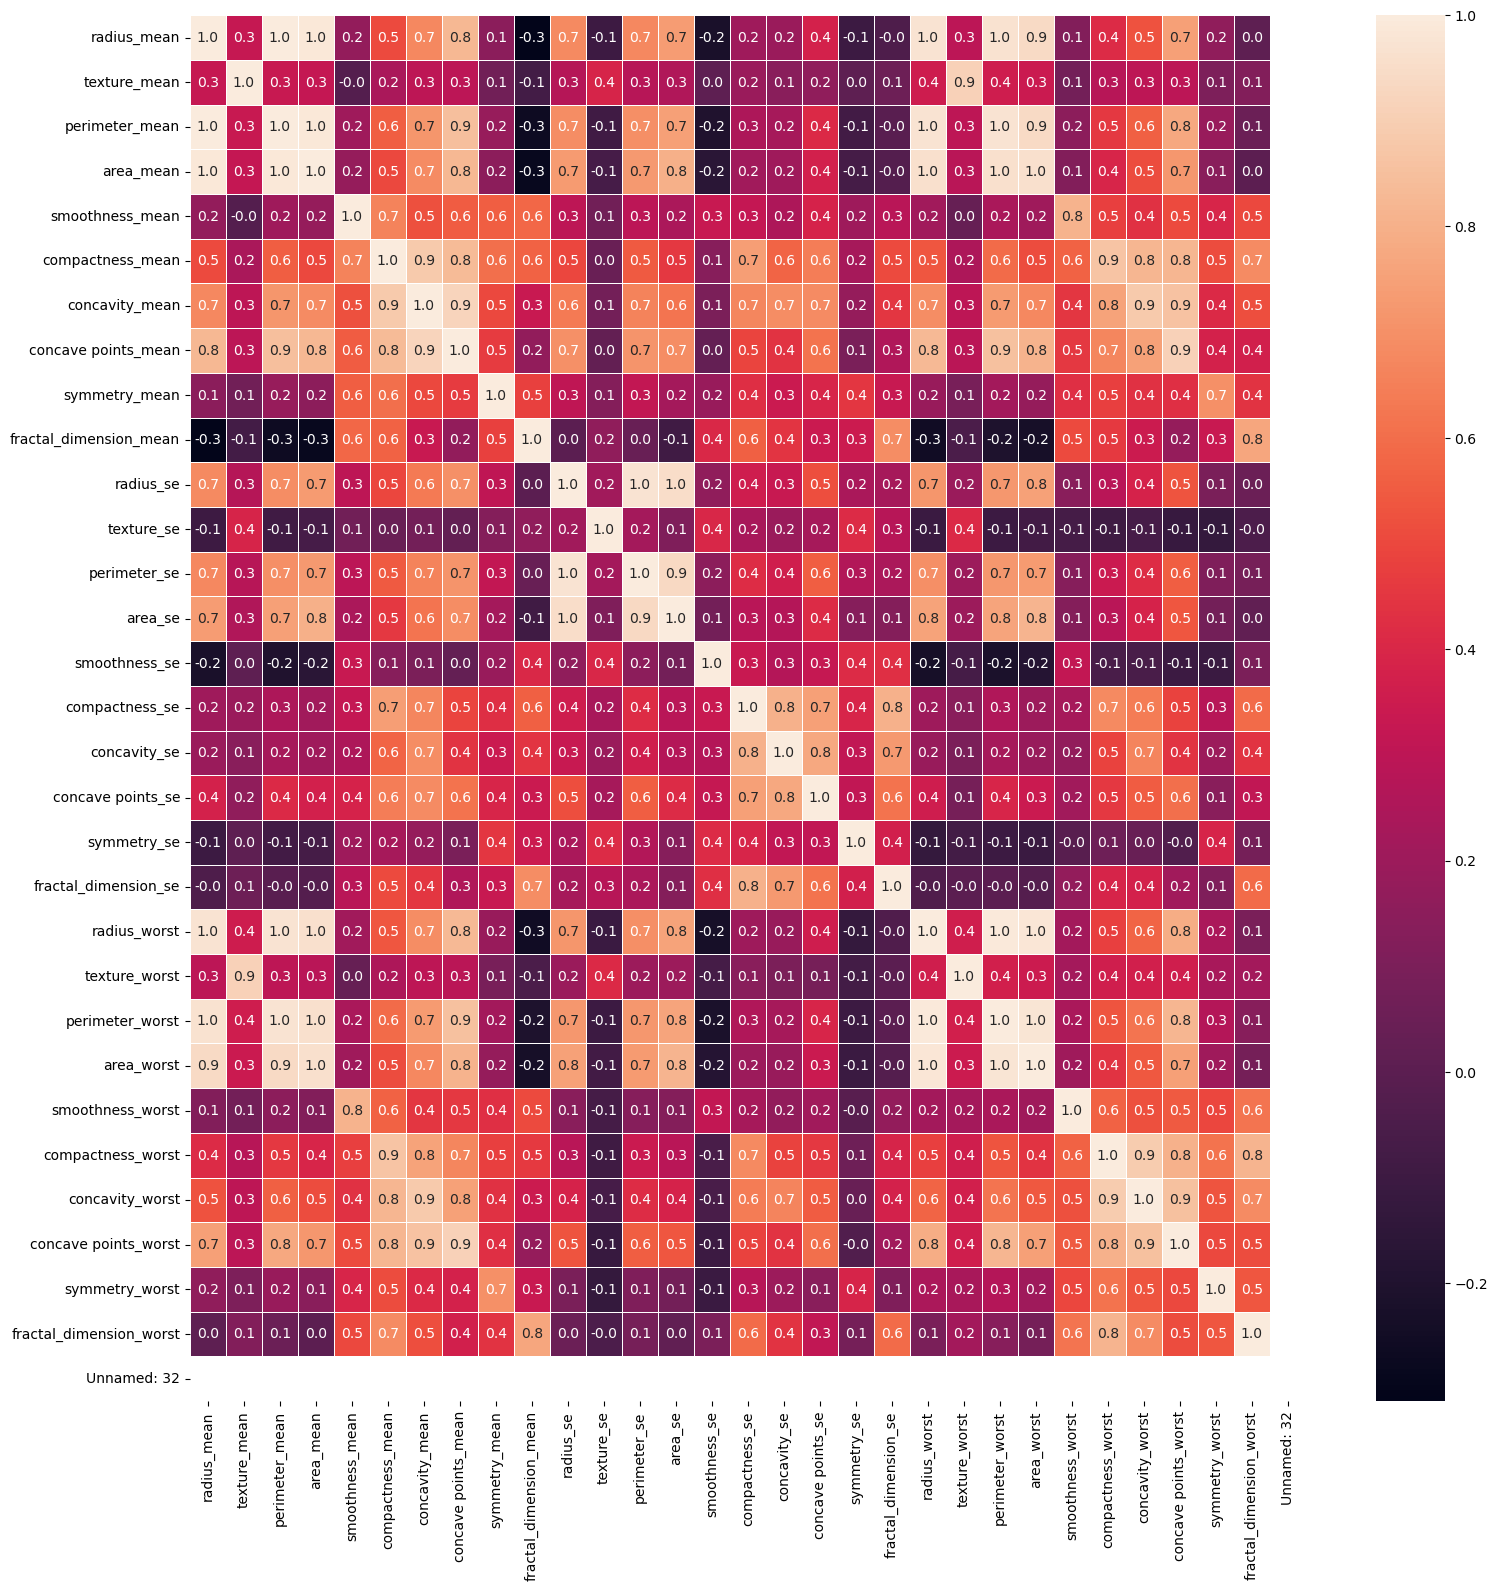

In [70]:
corr_matrix = df.select_dtypes(include=["float"]).corr()
plt.figure(figsize=(18, 18))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt = ".1f")

## Missing values treatment

In [23]:
# no missing values treatment is needed since there are no missing values in the dataset as found in Sanity Check

## Outlier treatment

### Removing outliers

In [80]:
total_rows = df.shape[0]
numerical_columns = df.select_dtypes(include=["float"]).columns

outlier_summary = {}
outlier_threshold = 0.10  
max_columns_to_clean = 3  

def calculate_impact_score(column):
    return column.std() * (column.skew() ** 2)

impact_scores = {col: calculate_impact_score(df[col]) for col in numerical_columns}

columns_to_clean = sorted(impact_scores, key=impact_scores.get, reverse=True)[:max_columns_to_clean]

for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = len(outliers)
    proportion_outliers = num_outliers / total_rows

    outlier_summary[col] = {
        "num_outliers": num_outliers,
        "proportion_outliers": proportion_outliers,
        "lower_bound": lower_bound,
        "upper_bound": upper_bound,
        "impact_score": impact_scores[col]
    }

    if col in columns_to_clean and proportion_outliers < outlier_threshold:
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        print(f"Removed {num_outliers} outliers from {col}")

for col, summary in outlier_summary.items():
    print(f"\nColumn: {col}")
    print(f"Number of outliers: {summary['num_outliers']}")
    print(f"Proportion of outliers: {summary['proportion_outliers']:.2%}")
    print(f"Lower bound: {summary['lower_bound']:.2f}")
    print(f"Upper bound: {summary['upper_bound']:.2f}")
    print(f"Impact score: {summary['impact_score']:.2f}")

print(f"\nFinal number of rows: {len(df)}")


Removed 11 outliers from area_mean
Removed 23 outliers from area_se
Removed 9 outliers from area_worst

Column: radius_mean
Number of outliers: 4
Proportion of outliers: 0.87%
Lower bound: 7.18
Upper bound: 18.40
Impact score: 0.09

Column: texture_mean
Number of outliers: 9
Proportion of outliers: 1.96%
Lower bound: 7.71
Upper bound: 29.00
Impact score: 2.09

Column: perimeter_mean
Number of outliers: 5
Proportion of outliers: 1.09%
Lower bound: 44.86
Upper bound: 120.74
Impact score: 0.95

Column: area_mean
Number of outliers: 11
Proportion of outliers: 2.40%
Lower bound: 72.47
Upper bound: 938.68
Impact score: 82.57

Column: smoothness_mean
Number of outliers: 6
Proportion of outliers: 1.31%
Lower bound: 0.06
Upper bound: 0.13
Impact score: 0.00

Column: compactness_mean
Number of outliers: 17
Proportion of outliers: 3.70%
Lower bound: -0.02
Upper bound: 0.20
Impact score: 0.07

Column: concavity_mean
Number of outliers: 26
Proportion of outliers: 5.66%
Lower bound: -0.07
Upper boun

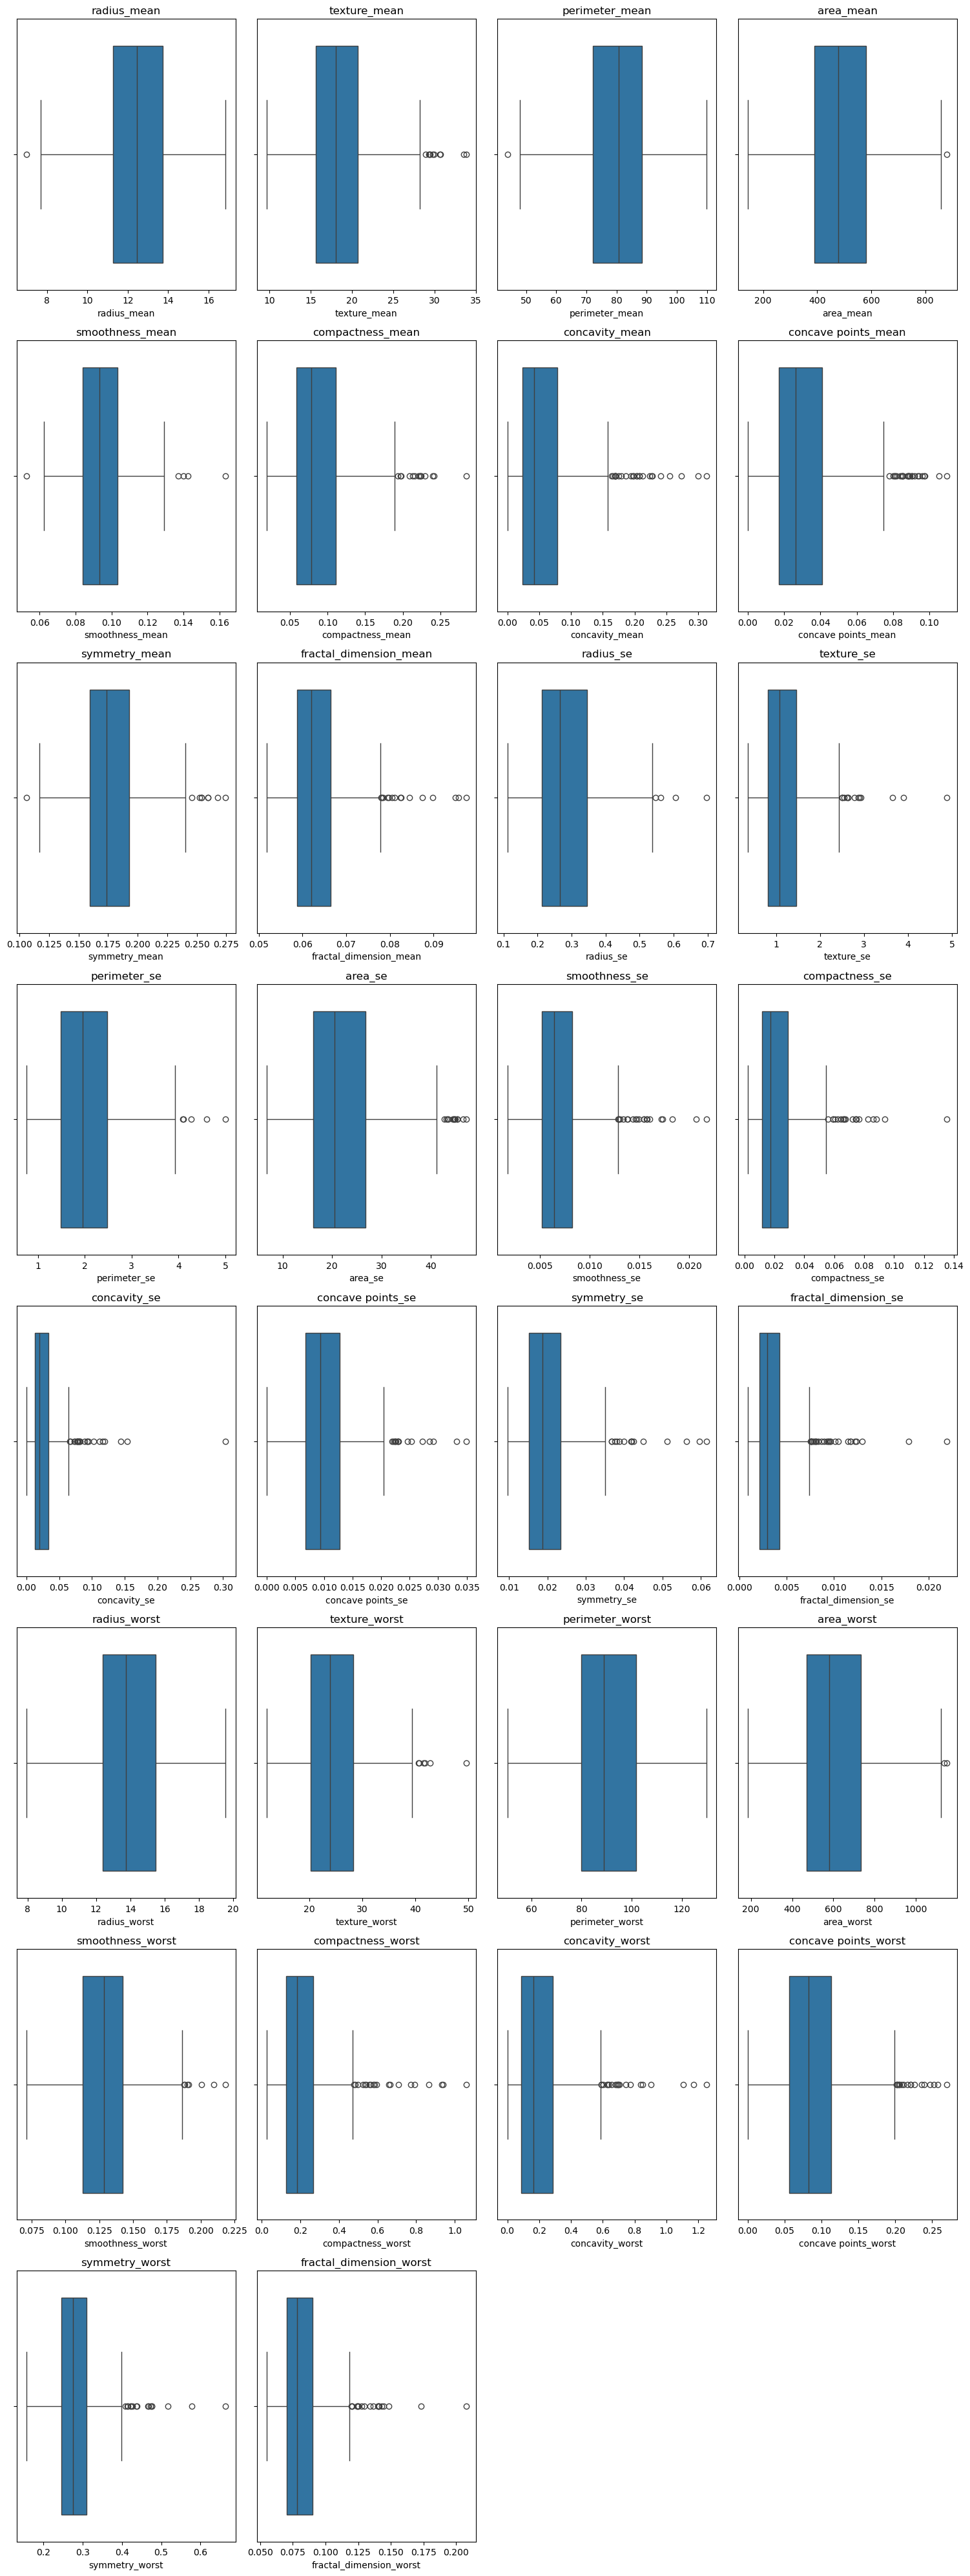

In [81]:
float_columns = df.select_dtypes(include=["float"]).columns
columns_to_plot = [col for col in float_columns if df[col].notna().any()]

num_columns = len(columns_to_plot)
n_cols = 4  
n_rows = math.ceil(num_columns / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  

for i, col in enumerate(columns_to_plot):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f"{col}")

for j in range(i + 1, len(axes)):
    axes[j].axis('off')  

plt.tight_layout()  
plt.show()


## Standardization And Seperation

### Standardization

In [97]:
from sklearn.preprocessing import StandardScaler

df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

num_cols = df.select_dtypes(include=["float"]).columns

scaler = StandardScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])

print(df.head().T)


                               3         5         8         9         10
diagnosis                       M         M         M         M         M
radius_mean             -0.554631 -0.001276  0.294205  0.004096  1.916664
texture_mean             0.464066 -0.668769  0.812631  1.350002  1.156355
perimeter_mean          -0.220744  0.174847  0.565682  0.285835  1.770689
area_mean                -0.70641 -0.070111   0.22846 -0.078502  2.172317
smoothness_mean          3.422859  2.380617  2.345167   1.72833 -0.862383
compactness_mean         4.584311  1.907394  2.452649  3.543157 -0.520633
concavity_mean           3.479654  1.892643  2.426076  3.211988 -0.476672
concave points_mean      3.329139  2.231309  2.802126  2.436334  0.079004
symmetry_mean            3.208423   1.22627  2.248439  1.004735 -0.946325
fractal_dimension_mean    4.97648  1.870539  1.544058  2.788766  -0.92204
radius_se                2.134228  0.498363  0.212011  0.123668  0.955309
texture_se              -0.072898 -0.5

### Seperate feature and labels

In [92]:
target_col = "diagnosis"
X = df.drop(columns=[target_col])  
y = df[target_col]  

print("Feature set shape:", X.shape)
print("Target set shape:", y.shape)


Feature set shape: (416, 30)
Target set shape: (416,)


### Test train split

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (291, 30)
Testing set shape: (125, 30)


# Models

## Naive Byes

Naïve Bayes Performance Metrics:
Accuracy: 0.9600
Precision: 0.8571
Recall: 0.9000
F1-Score: 0.8780

Confusion Matrix:
[[102   3]
 [  2  18]]

Classification Report:
              precision    recall  f1-score   support

      Benign       0.98      0.97      0.98       105
   Malignant       0.86      0.90      0.88        20

    accuracy                           0.96       125
   macro avg       0.92      0.94      0.93       125
weighted avg       0.96      0.96      0.96       125



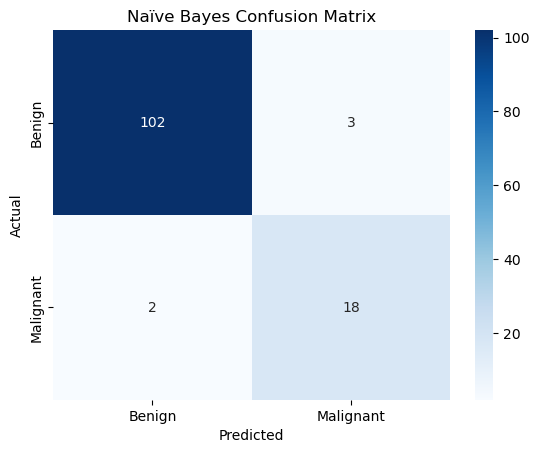

In [99]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report


nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label="M") 
recall = recall_score(y_test, y_pred, pos_label="M")
f1 = f1_score(y_test, y_pred, pos_label="M")


print("Naïve Bayes Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Benign", "Malignant"]))

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Naïve Bayes Confusion Matrix")
plt.show()

nb_results = {"Model": "Naïve Bayes", "Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-Score": f1}

## KNN

### K = 3

K-Nearest Neighbors (k=3) Performance Metrics:
Accuracy: 0.9600
Precision: 0.8947
Recall: 0.8500
F1-Score: 0.8718

Confusion Matrix:
[[103   2]
 [  3  17]]

Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      0.98      0.98       105
   Malignant       0.89      0.85      0.87        20

    accuracy                           0.96       125
   macro avg       0.93      0.92      0.92       125
weighted avg       0.96      0.96      0.96       125



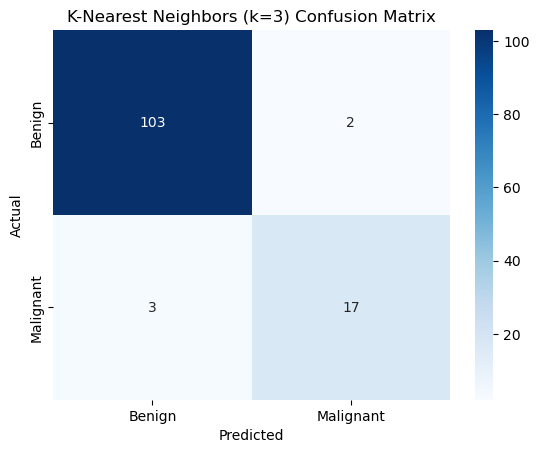

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, pos_label="M")
recall_knn = recall_score(y_test, y_pred_knn, pos_label="M")
f1_knn = f1_score(y_test, y_pred_knn, pos_label="M")

print("K-Nearest Neighbors (k=3) Performance Metrics:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1-Score: {f1_knn:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_knn)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn, target_names=["Benign", "Malignant"]))

sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("K-Nearest Neighbors (k=3) Confusion Matrix")
plt.show()


knn_results3 = {"Model": "KNN (k=3)", "Accuracy": accuracy_knn, "Precision": precision_knn, "Recall": recall_knn, "F1-Score": f1_knn}



### K = 5

K-Nearest Neighbors (k=5) Performance Metrics:
Accuracy: 0.9680
Precision: 0.9444
Recall: 0.8500
F1-Score: 0.8947

Confusion Matrix:
[[104   1]
 [  3  17]]

Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98       105
   Malignant       0.94      0.85      0.89        20

    accuracy                           0.97       125
   macro avg       0.96      0.92      0.94       125
weighted avg       0.97      0.97      0.97       125



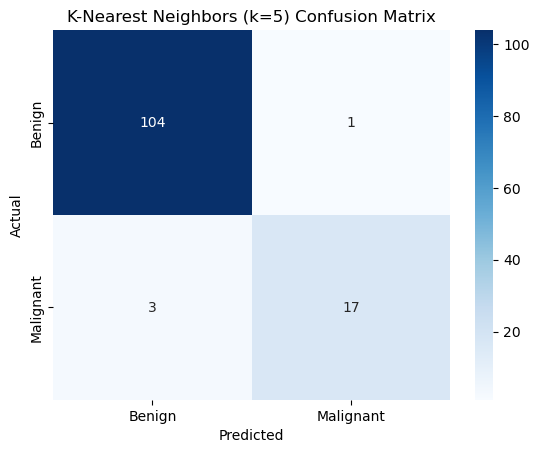

In [ ]:

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, pos_label="M")
recall_knn = recall_score(y_test, y_pred_knn, pos_label="M")
f1_knn = f1_score(y_test, y_pred_knn, pos_label="M")

print("K-Nearest Neighbors (k=5) Performance Metrics:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1-Score: {f1_knn:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_knn)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn, target_names=["Benign", "Malignant"]))

sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("K-Nearest Neighbors (k=5) Confusion Matrix")
plt.show()

knn_results5 = {"Model": "KNN (k=5)", "Accuracy": accuracy_knn, "Precision": precision_knn, "Recall": recall_knn, "F1-Score": f1_knn}



### K = 7

K-Nearest Neighbors (k=7) Performance Metrics:
Accuracy: 0.9680
Precision: 0.9444
Recall: 0.8500
F1-Score: 0.8947

Confusion Matrix:
[[104   1]
 [  3  17]]

Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98       105
   Malignant       0.94      0.85      0.89        20

    accuracy                           0.97       125
   macro avg       0.96      0.92      0.94       125
weighted avg       0.97      0.97      0.97       125



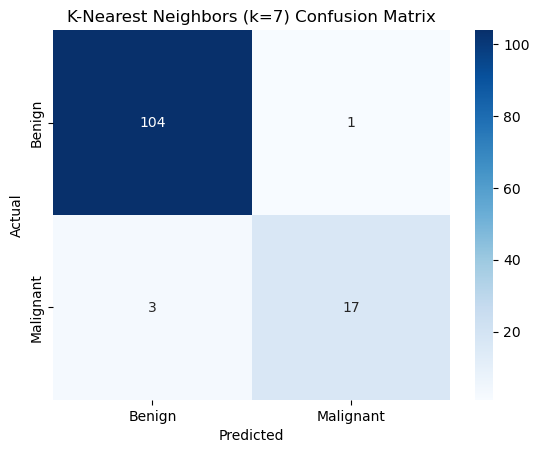

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, pos_label="M")
recall_knn = recall_score(y_test, y_pred_knn, pos_label="M")
f1_knn = f1_score(y_test, y_pred_knn, pos_label="M")

print("K-Nearest Neighbors (k=7) Performance Metrics:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1-Score: {f1_knn:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_knn)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn, target_names=["Benign", "Malignant"]))

sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("K-Nearest Neighbors (k=7) Confusion Matrix")
plt.show()

knn_results7 = {"Model": "KNN (k=7)", "Accuracy": accuracy_knn, "Precision": precision_knn, "Recall": recall_knn, "F1-Score": f1_knn}



## Decision tree

Decision Tree Performance Metrics:
Accuracy: 0.9520
Precision: 0.8500
Recall: 0.8500
F1-Score: 0.8500

Confusion Matrix:
[[102   3]
 [  3  17]]

Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      0.97      0.97       105
   Malignant       0.85      0.85      0.85        20

    accuracy                           0.95       125
   macro avg       0.91      0.91      0.91       125
weighted avg       0.95      0.95      0.95       125



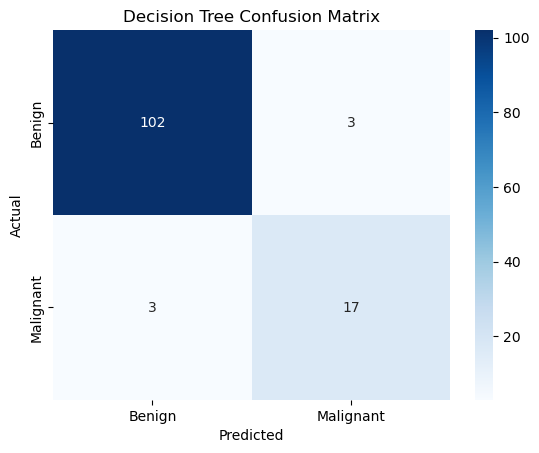

In [105]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, pos_label="M")
recall_dt = recall_score(y_test, y_pred_dt, pos_label="M")
f1_dt = f1_score(y_test, y_pred_dt, pos_label="M")

print("Decision Tree Performance Metrics:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-Score: {f1_dt:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_dt)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=["Benign", "Malignant"]))

sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()

dt_results = {"Model": "Decision Tree", "Accuracy": accuracy_dt, "Precision": precision_dt, "Recall": recall_dt, "F1-Score": f1_dt}


## Logistic regression

Logistic Regression Performance Metrics:
Accuracy: 0.9840
Precision: 1.0000
Recall: 0.9000
F1-Score: 0.9474

Confusion Matrix:
[[105   0]
 [  2  18]]

Classification Report:
              precision    recall  f1-score   support

      Benign       0.98      1.00      0.99       105
   Malignant       1.00      0.90      0.95        20

    accuracy                           0.98       125
   macro avg       0.99      0.95      0.97       125
weighted avg       0.98      0.98      0.98       125



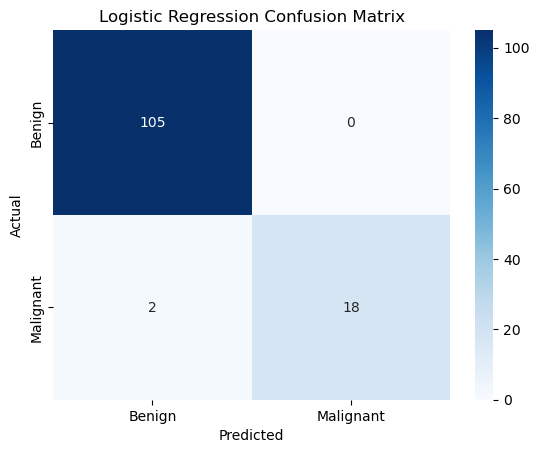

In [106]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, pos_label="M")
recall_lr = recall_score(y_test, y_pred_lr, pos_label="M")
f1_lr = f1_score(y_test, y_pred_lr, pos_label="M")

print("Logistic Regression Performance Metrics:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-Score: {f1_lr:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_lr)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=["Benign", "Malignant"]))

sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

lr_results = {"Model": "Logistic Regression", "Accuracy": accuracy_lr, "Precision": precision_lr, "Recall": recall_lr, "F1-Score": f1_lr}


### Hyperparameter tuning 

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],  
    "solver": ["liblinear", "lbfgs"]  
}

lr = LogisticRegression(random_state=42, max_iter=1000)

grid_search = GridSearchCV(lr, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

best_lr_model = LogisticRegression(**best_params, random_state=42, max_iter=1000)
best_lr_model.fit(X_train, y_train)

y_pred_best_lr = best_lr_model.predict(X_test)

conf_matrix_best_lr = confusion_matrix(y_test, y_pred_best_lr)
accuracy_best_lr = accuracy_score(y_test, y_pred_best_lr)
precision_best_lr = precision_score(y_test, y_pred_best_lr, pos_label="M")
recall_best_lr = recall_score(y_test, y_pred_best_lr, pos_label="M")
f1_best_lr = f1_score(y_test, y_pred_best_lr, pos_label="M")

print("\nBest Logistic Regression Performance:")
print(f"Accuracy: {accuracy_best_lr:.4f}")
print(f"Precision: {precision_best_lr:.4f}")
print(f"Recall: {recall_best_lr:.4f}")
print(f"F1-Score: {f1_best_lr:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_best_lr)

tuned_lr_results = {
    "Model": "Logistic Regression (Tuned)",
    "Accuracy": accuracy_best_lr,
    "Precision": precision_best_lr,
    "Recall": recall_best_lr,
    "F1-Score": f1_best_lr,
}


Best Parameters: {'C': 0.1, 'solver': 'liblinear'}

Best Logistic Regression Performance:
Accuracy: 0.9920
Precision: 1.0000
Recall: 0.9500
F1-Score: 0.9744

Confusion Matrix:
[[105   0]
 [  1  19]]


### visualizing decision boundaries

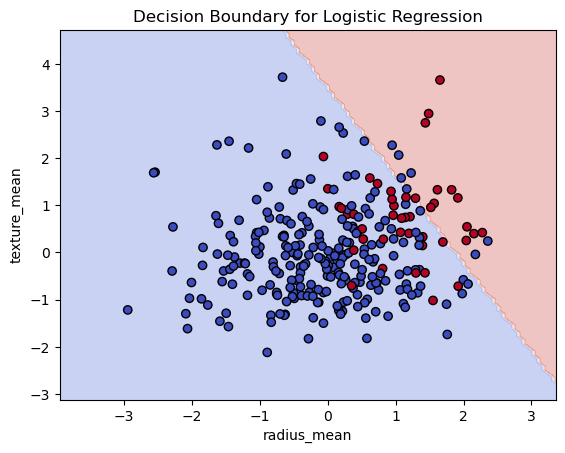

In [117]:
feature1, feature2 = "radius_mean", "texture_mean"
X_vis = X_train[[feature1, feature2]]
y_vis = y_train.map({"B": 0, "M": 1})  

lr_2d = LogisticRegression(**best_params, random_state=42, max_iter=1000)
lr_2d.fit(X_vis, y_vis)

# create mesh grid
x_min, x_max = X_vis[feature1].min() - 1, X_vis[feature1].max() + 1
y_min, y_max = X_vis[feature2].min() - 1, X_vis[feature2].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# predict on mesh grid
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_df = pd.DataFrame(grid_points, columns=[feature1, feature2])
Z = lr_2d.predict(grid_points_df)
Z = Z.reshape(xx.shape)

# plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X_vis[feature1], X_vis[feature2], c=y_vis, edgecolor="k", cmap="coolwarm")
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("Decision Boundary for Logistic Regression")
plt.show()


## comparision 

In [ ]:
model_comparison = pd.DataFrame([nb_results, knn_results3, knn_results5, knn_results7, dt_results, lr_results, tuned_lr_results])

print("\nModel Performance Comparison:")
print(model_comparison)

best_model = model_comparison.loc[model_comparison["F1-Score"].idxmax()]
print("\nBest Performing Model:")
print(best_model)



Model Performance Comparison:
                         Model  Accuracy  Precision  Recall  F1-Score
0                  Naïve Bayes     0.960   0.857143    0.90  0.878049
1                    KNN (k=3)     0.960   0.894737    0.85  0.871795
2                    KNN (k=5)     0.968   0.944444    0.85  0.894737
3                    KNN (k=7)     0.968   0.944444    0.85  0.894737
4                Decision Tree     0.952   0.850000    0.85  0.850000
5          Logistic Regression     0.984   1.000000    0.90  0.947368
6  Logistic Regression (Tuned)     0.992   1.000000    0.95  0.974359

Best Performing Model:
Model        Logistic Regression (Tuned)
Accuracy                           0.992
Precision                            1.0
Recall                              0.95
F1-Score                        0.974359
Name: 6, dtype: object


# Model Performance Analysis  

## Best Performing Model: Logistic Regression (Tuned)  

### **Performance Metrics**  
The **Hyperparemeter tuned Logistic Regression model** achieved the best results among all models.

### **Why Did Logistic Regression (Tuned) Perform Best?**  

1. **Linear Separability of the Dataset**  
   - Breast cancer datasets often exhibit **linear decision boundaries**, making **Logistic Regression a natural fit**.  
   - Unlike Decision Trees and KNN, which rely on non-linear patterns, Logistic Regression is **less prone to overfitting** when data is well-structured.  

2. **Optimized Model Through Hyperparameter Tuning**  
   - By **tuning the regularization parameter (C)**, we improved recall **without sacrificing precision**.  
   - This optimization **balanced bias and variance**, leading to the **best overall generalization**.  

3. **Avoidance of Overfitting Compared to Other Models**  
   - **Decision Trees** tend to **overfit** unless post-pruned properly.  
   - **KNN** is sensitive to **local noise** and struggles with **high-dimensional feature spaces**.  
   - Logistic Regression **generalizes well**, making it a more stable choice.  

4. **Best Trade-Off Between Precision and Recall**  
   - **Perfect Precision (1.0)**: No false positives, meaning no benign cases were misclassified as malignant.  
   - **High Recall (0.95)**: Almost all malignant cases were correctly identified.  
   - **Best F1-Score (0.974)**: Shows strong balance between detecting cancer cases and avoiding misdiagnoses.  

### **Conclusion**  
 **Tuned Logistic Regression is the most reliable model** for this dataset because:  
- It **generalizes well** without overfitting.  
- It **perfectly classifies all benign cases (precision = 1.0)**.  
- It **captures nearly all malignant cases (recall = 0.95)**.  

This makes it **the most interpretable and effective** model for breast cancer classification.  